# ECE657A Homework 1
## Juan Manuel Gomez Gonzalez

Python 3.7 was used for this homework, in Windows 10 using Anaconda, Visual Studio Code and Jupyter Notebook. The Pandas, Matplotlib and Scipy.stats libraries for Python were used.

The Pandas 10 minute tutorial, Pandas Cheat Sheet and Pandas CookBook were used to learn how to use the basic functions of Pandas. These documents can be obtained from [1]. One of Pandas' premise is that it permits the easy creation of a component called DataFrame, which facilitates the manipulation of data and many operations that can be carried out with it.

For the statistical component of the homework, Scipy.stats and numpy were used. The tutorial for Scipy.stats’ statistical functions can be found in [2], and Numpy’s statistical functions can be seen in [3]. These references indicate the way of using the methods for obtaining the mean, mode, skewness, variance and the Pearson Correlation Coefficient.

Matplotlib’s API guide [4] as well as its gallery [5] and Real Python’s matplotlib guide [6] were used to understand matplotlib’s basics and how to graph using Python. Matplotlib eases the construction and display of figures, including histograms and many types of plots, in an easy to use scheme, similar even to Matlab's own.

Prior to manipulating the dataset, the import of libraries that will be used in the homework must be carried out:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Opening the database (wdbc.data) using a program that can interpret text files (Excel, Google Chrome, Notepad, etc) shows that the database seems to be comprised of comma separated values (CSV) and has no headers. The Breast Cancer Diagnostic Dataset file can then be opened as a CSV file and loaded as a Pandas DataFrame, which works similar to a matrix but allowing for easier manipulation. The header option must be set to 'None' so as to not lose the information present on the first row, because Pandas assumes it includes header information. The dataset can be loaded from a local computer or directly from the dataset's server.

In [2]:
#Uncomment the next line to load from local computer, needs to be in the same folder as the notebook.
#df=pd.read_csv('wdbc.data', header=None)

#Comment next line if the dataset will be loaded locally.
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
               header=None) #Load from WWW
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

The .info() method returns information about the DataFrame, including the number of rows (569) and columns (32) and what type of data is stored in each of those columns.

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The .head() method allows a peek at the information loaded into the DataFrame, showing the 32 columns previously mentioned. According to the dataset's description, the dataset includes information of 569 patients each with their ID, diagnosis (Malignant or Benign, 'M' or 'B'), and ten features of the cells’ nuclei present in a breast mass sample obtained from the patients using a Fine Needle Aspirate technique. The ten features are each represented by its mean, standard error and the largest or ‘worst’ value, for a total of 30 features as described in [7]. The description also indicates that there is no missing values in the dataset. The units and techniques of measurement of the different features can be found in [8].

As the dataset does not have headers included in it, it is better to include them so as to make it easier to read.
The following code allows for the creation of the different headers and adds them to the DataFrame 'df':

In [4]:
#Create list for renaming the header row of the database
headerNames=['id','diagnosis'] #First headers
headerExtraFeatures=['radius', 'texture','perimeter','area','smoothness','compactness','concavity',
                     'concave points','symmetry','fractal dimension'] #The rest of the headers without its 'suffixes'
headerFeaturesSuffix=[' - mean',' - standard error',' - worst'] #The 'suffixes'

for i in range(0,3):
    for j in range(0,10):
        headerNames.append(headerExtraFeatures[j] + headerFeaturesSuffix[i])

df.columns=headerNames #Rename the header row of the database
df.head()

,id,diagnosis,radius - mean,texture - mean,perimeter - mean,area - mean,smoothness - mean,compactness - mean,concavity - mean,concave points - mean,...,radius - worst,texture - worst,perimeter - worst,area - worst,smoothness - worst,compactness - worst,concavity - worst,concave points - worst,symmetry - worst,fractal dimension - worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now each column of the dataset indicates what information it includes. This also allows us to call each column of the DataFrame by its name, facilitating the viewing and understanding of the code.

### Task 1

To obtain the mean, mode, skewness, standard deviation (SD) and variance, both scipy.stats and numpy libraries were used. Scipy.stats' function 'mode' returns an array which contains both the number with the highest repetition and the amount of times it appears in the vector. If multiple numbers have the same mode, the function returns the smallest (or lowest) number of the set.

In [5]:
#Obtain Mean, Mode, Skewness, SD and Variance of each column and generate a DataFrame with all the information
dfStats=pd.DataFrame(columns=['Mean','Mode','Skewness','SD','Variance'])#Create an empty DataFrame with these headers
for column in df.columns[2:]: #Obtain the statistic values for each column
    dfStats.loc[column,'Mean']=np.mean(df[column]) #Mean
    dfStats.loc[column,'Mode']=stats.mode(df[column]) #Mode
    dfStats.loc[column,'Skewness']=stats.skew(df[column]) #Skewness
    dfStats.loc[column,'SD']=np.std(df[column]) #SD
    dfStats.loc[column,'Variance']=np.var(df[column]) #Variance
dfStats #Show the resulting DataFrame

,Mean,Mode,Skewness,SD,Variance
radius - mean,14.1273,"([12.34], [4])",0.939893,3.52095,12.3971
texture - mean,19.2896,"([14.93], [3])",0.648734,4.29725,18.4664
perimeter - mean,91.969,"([82.61], [3])",0.988037,24.2776,589.403
area - mean,654.889,"([512.2], [3])",1.64139,351.605,123626
smoothness - mean,0.0963603,"([0.1007], [5])",0.45512,0.0140518,0.000197452
compactness - mean,0.104341,"([0.1147], [3])",1.18698,0.0527663,0.00278429
concavity - mean,0.0887993,"([0.0], [13])",1.39748,0.0796497,0.00634408
concave points - mean,0.0489191,"([0.0], [13])",1.16809,0.0387687,0.00150301
symmetry - mean,0.181162,"([0.1601], [4])",0.723695,0.0273902,0.000750222
fractal dimension - mean,0.0627976,"([0.056670000000000005], [3])",1.30105,0.00705416,4.97611e-05


The DataFrame dfStats contains the mean, mode (with both the number and number of repetitions), skewness, standard deviation and variance of the 30 features included in the dataset, but the related features (e.g. the radius - mean, radius - standard error and radius - worst) are scattered in different, noncontiguous rows. Using the sort_index method allows for the features that are related to be presented together, allowing for easier comparison:

In [6]:
dfStats.sort_index(inplace=True) #Sort the index of the DataFrame in alphabetical order
dfStats #Show the DataFrame

,Mean,Mode,Skewness,SD,Variance
area - mean,654.889,"([512.2], [3])",1.64139,351.605,123626
area - standard error,40.3371,"([16.64], [3])",5.43282,45.451,2065.79
area - worst,880.583,"([284.4], [2])",1.85447,568.856,323598
compactness - mean,0.104341,"([0.1147], [3])",1.18698,0.0527663,0.00278429
compactness - standard error,0.0254781,"([0.011040000000000001], [3])",1.8972,0.0178924,0.000320139
compactness - worst,0.254265,"([0.1486], [3])",1.46967,0.157198,0.0247113
concave points - mean,0.0489191,"([0.0], [13])",1.16809,0.0387687,0.00150301
concave points - standard error,0.0117961,"([0.0], [13])",1.44087,0.00616486,3.80055e-05
concave points - worst,0.114606,"([0.0], [13])",0.491316,0.0656746,0.00431315
concavity - mean,0.0887993,"([0.0], [13])",1.39748,0.0796497,0.00634408


The 30 features, sorted by name and with their respective mean, mode, skewness, SD and variance, can be seen in the table above.

### Task 2
On the second task, the Pearson Correlation Coefficient (PCC) between two features is requested. The PCC indicates the level of correlation between two variables, where a PCC of 1 or -1 expresses a strong positive or negative correlation, respectively. A PCC value of 0 indicates that there is no linear correlation between the two variables. [9]. The PCC can be calculated using Scipy.stats' pearsonr function, which also gives the p value of the correlation, as shown:

In [7]:
pccVal1=df['radius - mean'] # Obtain the mean radius column of the dataset
pccVal2=df['area - mean'] # Obtain the mean area column of the dataset
pcc=stats.pearsonr(pccVal1,pccVal2) #Calculate the PCC for both variables
pcc

(0.9873571700566123, 0.0)

For the features of mean radius and mean area a correlation coefficient of 0.99 with a p value of 0 was obtained, which indicates a direct correlation with statistical significance. This means that when the radius grows, so does the area of the cell's nuclei, which is the expected behavior.

A second PCC calculation can be seen next:

In [8]:
pccVal1=df['area - mean'] # Obtain the mean area column of the dataset
pccVal2=df['concavity - standard error'] # Obtain the standard error of the concavity column of the dataset
pcc=stats.pearsonr(pccVal1,pccVal2) #Calculate the PCC for both variables
pcc

(0.20766006048256913, 5.818487568410472e-07)

In the case in which the features of the "mean area" and the "concavity's standard error" are compared, a PCC of 0.21 is obtained with a p value less than 0.001, which indicates statistical significance. This seems to suggest that there is a weak linear correlation between the two features.

In [9]:
pccVal1=df['texture - worst'] # Obtain the worst texture column of the dataset
pccVal2=df['fractal dimension - standard error'] # Obtain the standard error of the fractal dimension column of the dataset
pcc=stats.pearsonr(pccVal1,pccVal2) #Calculate the PCC for both variables
pcc

(-0.003195028868089591, 0.9393825625079247)

In this third case, we have a correlation of practically zero and a p value of 0.94. What this indicates is that there is not a linear correlation between the features of "worst texture" and "standard error of the fractal dimension".

### Task 3
For the histogram task, the mean radius of the benign and malignant cases were obtained, and each was used to represent its own histogram.

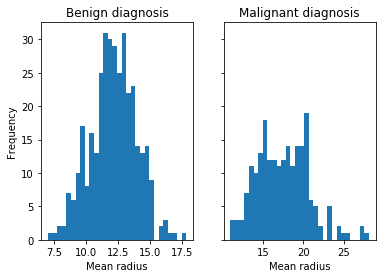

In [10]:
dfDiagB=df[df.diagnosis=='B'] #Obtain the patients with a Benign diagnosis
dfDiagM=df[df.diagnosis=='M'] #Obtain the patients with a Malignant diagnosis

binNumber = 30 #A number of bins can be entered here, or an 'auto' switch can be used for the function to define it.

fig1, axs = plt.subplots(1, 2, sharey=True) #Create a figure to show the plots, share the same y axis
_unusedArray=axs[0].hist(dfDiagB['radius - mean'], bins=binNumber) #Plot the B cases radius' histogram
_unusedArray=axs[1].hist(dfDiagM['radius - mean'], bins=binNumber) #Plot the M cases radius' histogram
_unusedText=axs[0].set_title('Benign diagnosis') #Add a title to the first histogram
_unusedText=axs[0].set_ylabel('Frequency') #Add a y axis label
_unusedText=axs[0].set_xlabel('Mean radius') #Add an x axis label
_unusedText=axs[1].set_title('Malignant diagnosis') #Add a title for the second histogram
_unusedText=axs[1].set_xlabel('Mean radius') #Add an x axis label

The histograms can be superimposed to show the difference in the radius between the malignant and benign cancer cells' nuclei.

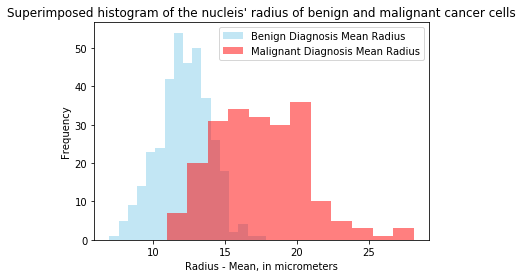

In [11]:
#Superimposed histogram creation
binNumber='auto' #Use automatic bin calculation for this histogram
fig2, ax2 = plt.subplots() #Create a new figure for the plots
plt.hist(dfDiagB['radius - mean'], binNumber, alpha=0.5, color='skyblue',
         label='Benign Diagnosis Mean Radius') #Create the histogram for the benign case
plt.hist(dfDiagM['radius - mean'], binNumber, alpha=0.5, color='red',
         label='Malignant Diagnosis Mean Radius') #Create the histogram for the malignant case
plt.legend(loc='upper right') #Create a legend in the upper right corner
plt.xlabel("Radius - Mean, in micrometers") #Create a label in the X axis
plt.ylabel("Frequency") #Create a label in the y axis
plt.title("Superimposed histogram of the nucleis' radius of benign and malignant cancer cells")
plt.show() #Display the histograms

As the legend in the upper right position indicates, the blue histogram shows the benign mean radius and the red histogram indicates the malignant mean radius. The histogram shows that, in general, malignant cells' nuclei have a bigger radius than its benign counterpart. An additional superimposed set of histograms can be calculated to compare another feature according to if its a benign or malignant diagnosis:

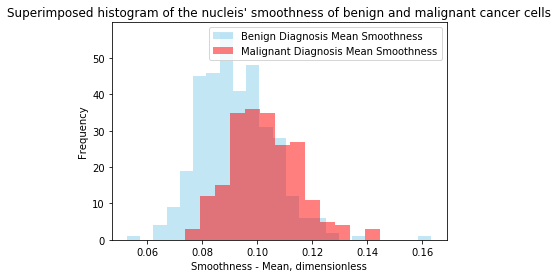

In [12]:
#Superimposed histogram creation
binNumber='auto' #Use automatic bin calculation for this histogram
fig3, ax3 = plt.subplots() #Create a new figure for the plots
plt.hist(dfDiagB['smoothness - mean'], binNumber, alpha=0.5, color='skyblue',
         label='Benign Diagnosis Mean Smoothness') #Create the histogram for the benign case
plt.hist(dfDiagM['smoothness - mean'], binNumber, alpha=0.5, color='red',
         label='Malignant Diagnosis Mean Smoothness') #Create the histogram for the malignant case
plt.legend(loc='upper right') #Create a legend in the upper right corner
plt.xlabel("Smoothness - Mean, dimensionless") #Create a label in the X axis
plt.ylabel("Frequency") #Create a label in the y axis
plt.title("Superimposed histogram of the nucleis' smoothness of benign and malignant cancer cells")
plt.show() #Display the histograms

Plotting the histograms of the smoothness for both the benign and malignant diagnoses shows that these variables have a stronger overlap, showing that it would be a less accurate classification tool if it were to be used as such in new diagnoses.

## Conclusions

The tasks presented can be accomplished using Python programming language as well as a combination of existing libraries like Pandas, numpy, scipy.stats and matplotlib.pyplot. The statistical values of the features present in the database can be obtained using a combination of Pandas' DataFrames and numpy's and scipy.stats' functions, as shown in the Task 1 subsection of this notebook. The Pearson Correlation Coefficient, as well as its p value, can be obtained using the pearsonr function present in scipy.stats' library. Matplotlib.pyplot's library is a useful tool for the representation of histograms based on an entered array, as shown in Task 3 of the present document.

## References

[1] Pandas Project, "Tutorials - pandas 0.23.4 documentation," Documentation on the use of the pandas library. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/tutorials.html. [Accessed January 8, 2019].

[2] The Scipy Community, "Statistical functions (scipy.stats) - SciPy v0.14.0 Reference Guide," Documentation on the use of the SciPy library, May 11, 2014. [Online]. Available: https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html. [Accessed January 8, 2019].

[3] The Scipy Community, "Statistics - NumPy v1.14.1 Manual," Documentation on the use of the NumPy library, Apr. 16, 2018. [Online]. Available: https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.statistics.html. [Accessed January 8, 2019].

[4] The Matplotlib Development Team, "matplotlib.pyplot.hist - Matplotlib 3.0.2 documentation," Documentation on the use of the Matplotlib library, Nov. 11, 2018. [Online]. Available: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html. [Accessed January 8, 2019].

[5] The Matplotlib Development Team, "Histograms - Matplotlib 3.0.2 documentation," Documentation on the use of the Matplotlib library, Nov. 11, 2018. [Online]. Available: https://matplotlib.org/gallery/statistics/hist.html. [Accessed January 8, 2019].

[6] B. Solomon, "Python Plotting With Matplotlib (Guide)," Real Python, Feb. 28, 2018. [Online]. Available: https://matplotlib.org/gallery/statistics/hist.html. [Accessed January 8, 2019].

[7] N. Street, "Wisconsin Diagnostic Breast Cancer (WDBC)," Information regarding the Wisconsin Diagnostic Breast Cancer Dataset, Nov., 1995. [Online]. Available: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names. [Accessed January 7, 2019].

[8] W.H. Wolberg, W.N. Street, D.M. Heisey and O.L. Mangasarian, "Computer-derived nuclear features distinguish malignant from benign breast cytology," Human Pathology, vol. 26, no. 7, pp. 792-796, July 1995. [Online]. Available: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.115.1604&rep=rep1&type=pdf. [Accessed January 9, 2019].

[9] N. Fenton, and M. Neil, Risk Assessment and Decision Analysis with Bayesian Networks. Boca Raton: CRC Press, 2015. Available: http://www.eecs.qmul.ac.uk/~norman/blog_articles/p_values.pdf. [Accessed January 9, 2019].